In [3]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import scipy.linalg as la

from visualise import (
    plot_3d_control,
    plot_action_history,
    plot_state_history,
    plot_terminal_cost_lyupanov,
)

import terminal_set
from mpc_with_ots import Controller
from main_disturbance import simulate


Initial state is  [0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
Target state to reach is  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Simulating: 100%|██████████| 100/100 [00:03<00:00, 29.88it/s]
/Users/andrei-carlo/Documents/uni/sc4232312_mpc/mpc_drone/visualise.py:32: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(actual[0, 1], reference[-1, 1])
/Users/andrei-carlo/Documents/uni/sc4232312_mpc/mpc_drone/visualise.py:33: UserWarning: Attempting to set identical low and high zlims makes transformation singular; automatically expanding.
  ax.set_zlim(actual[0, 2], reference[-1, 2])


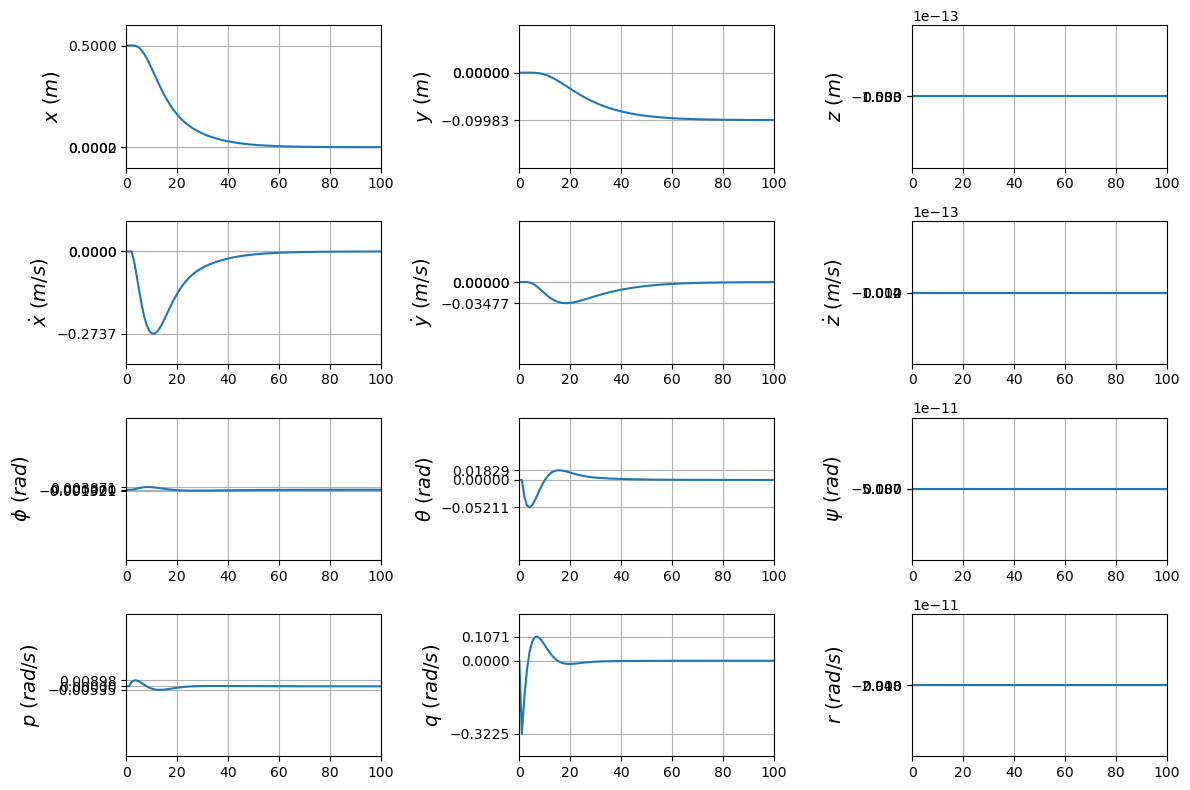

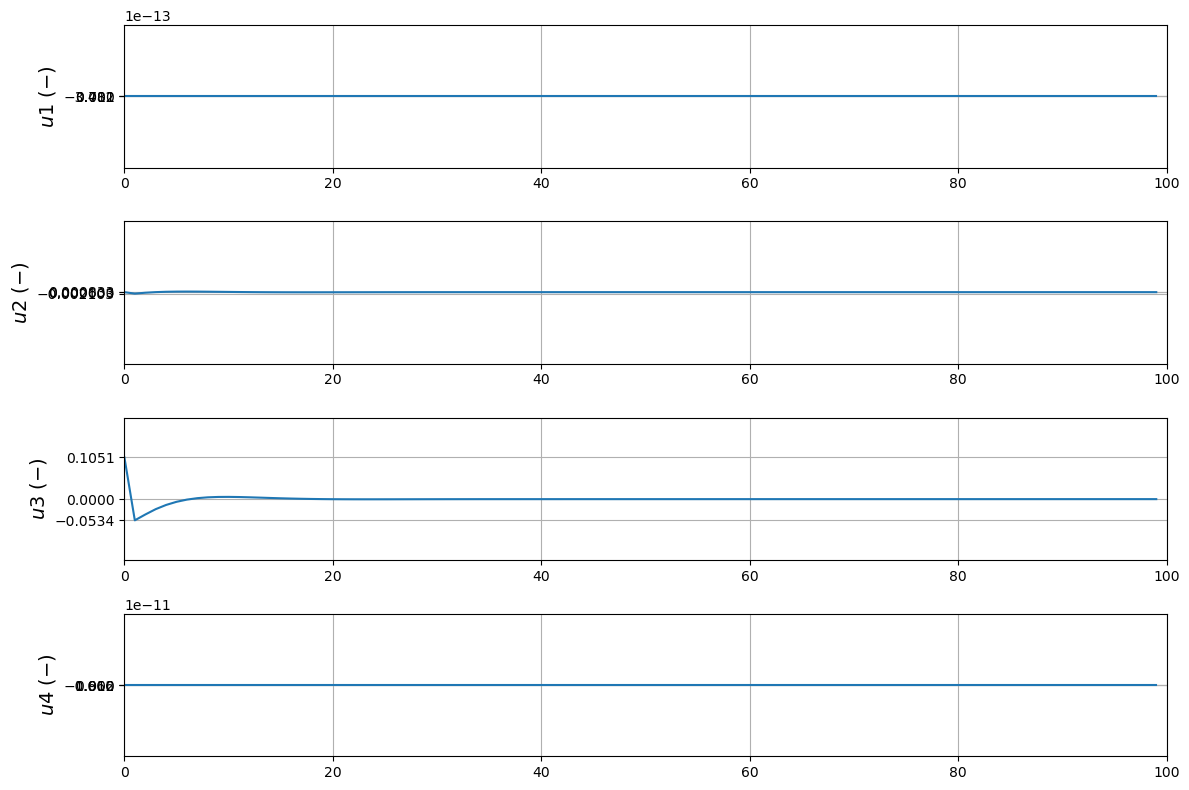

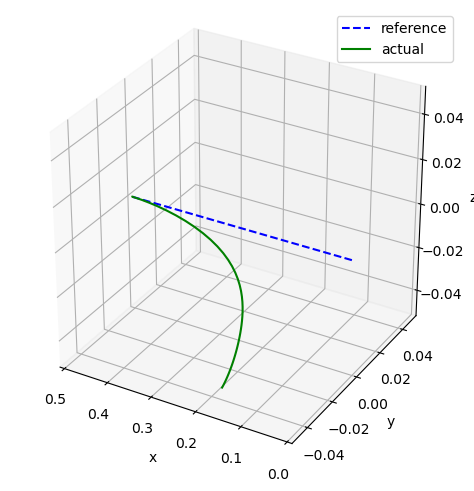

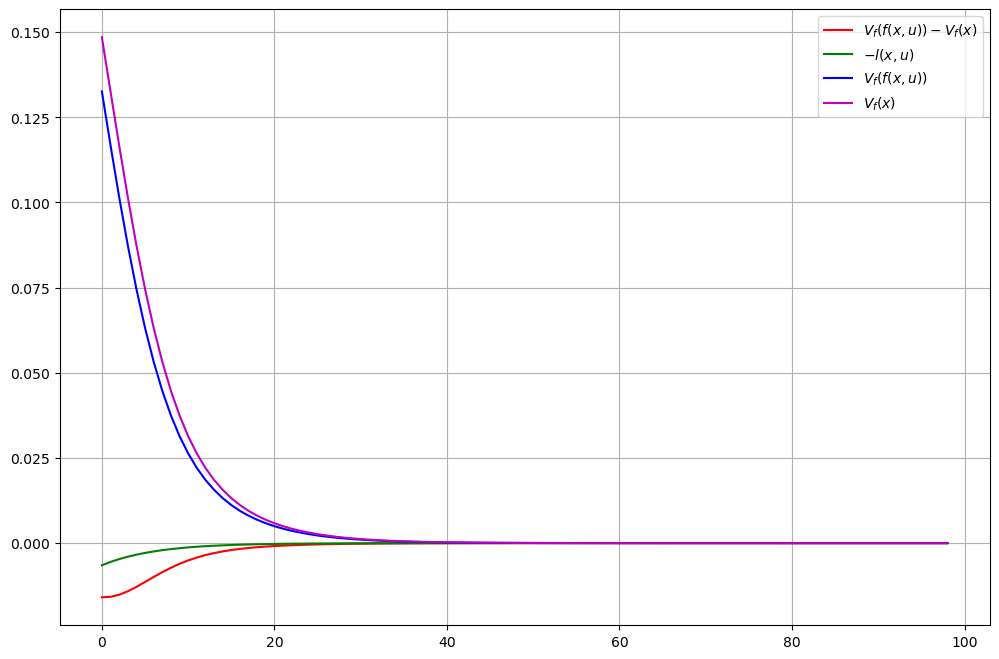

In [4]:
dt = 0.10  # Sampling period
N = 20 # MPC Horizon
T = 100  # Duration of simulation
x_init = np.zeros(12)  # Initial conditions
x_target = np.zeros(12)  # State to reach
x_init[0:3] = np.array([0.5, 0.0, 0.0])
x_init[3:6] = np.array([0.0, 0.0, 0.0])

print("Initial state is ", x_init)
print("Target state to reach is ", x_target)

 # Controller
ctrl = Controller(
    mpc_horizon=N,
    timestep_mpc_stages=dt,
    control_type='mpc' # or 'mpc'
)

ctrl.d = np.array([0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

# this also rebuilds mpc problem to include the new constraint
# Q: Can I have both of these methods working together?
# ctrl.c_level = terminal_set.calculate_c(ctrl, x_target) # this enables t set
# ctrl.beta = 0.1 # this enables terminal cost


# print("C is ", ctrl.c_level)

states, inputs, plans, timesteps, Vf, l, outputs, disturbance_est= simulate(
    controller=ctrl,
    x_init=x_init,
    y_target=x_target,
    T=T,
    plot=True,
    plots_suffix="_disturbance"
    )


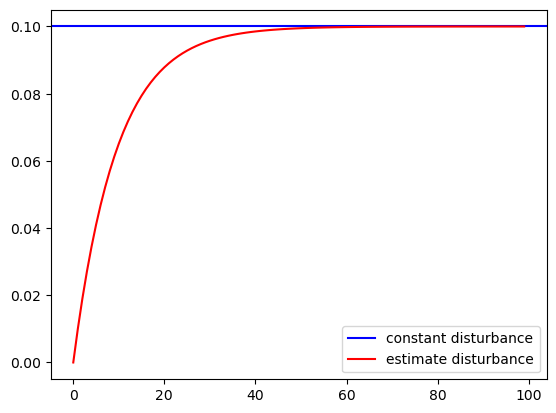

In [5]:
disturbance_est[:, 100]

plt.axhline(ctrl.d[1], color='b', label='constant disturbance')
plt.plot(range(T), disturbance_est[1, :-1], color='r', label='estimate disturbance')
plt.legend()

In [ ]:
plt.plot()